# Constitution des jeux de données pour le Challenge de la Data party 
# *Les 30 ans de la MTD*



In [ ]:
# Paramètres

collections_hal = ["TETIS", "ESPACE-DEV"]

# Hal : métadonnées récupérées

Plus d'information sur la documentation de l'API : https://api.archives-ouvertes.fr/docs/search/?schema=field-types#field-types

| Champ                | Description                                           |
| -------------------- | ----------------------------------------------------- |
| docid                | Identifiant du document dans la base de données HAL.   |
| halId_s              | Identifiant HAL unique associé au document.            |
| title_s              | Titre du document.                                     |
| authFullName_s       | Noms complets des auteurs.                             |
| authOrganismId_i     | ID des organismes.                                     |
| authOrganism_s       | Nom des affiliations.                                  |
| structCountry_s      | Code à 2 lettres des pays des auteurs                  |
| structAddress_s      | Adresses postal des auteurs                            |
| domainAllCode_s      | Thématique                                             |
| submittedDate_s      | Date de soumission du document.                        |
| abstract_s           | Résumé du document.                                    |
| journalDate_s        | Date de publication dans le journal.                   |
| publicationDate_s    | Date de publication du document.                       |
| producedDate_s       | Date de production du document.                        |
| docType_s            | Type de document (ART pour article, COUV pour couverture, etc.). |
| doiId_s              | Identifiant DOI associé au document.                   |
| journalPublisher_s   | Éditeur du journal dans lequel le document a été publié. |
| journalTitle_s       | Titre du journal dans lequel le document a été publié.  |
| journalIssn_s        | ISSN du journal dans lequel le document a été publié.   |
| researchData_s       | Identifiants (DOI) des données de recherche associées.  |
| docSubType_s         | Sous doc type: data paper, preprint, ...               |

In [55]:
import requests
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("pastel")
import matplotlib.pyplot as plt

my_lab = "TETIS"
hal_collection_url = f"https://api.archives-ouvertes.fr/search/{my_lab}"
# free_text_search = "geonlplify"
free_text_search = "*"
hal_api_params = {
    'q': f"{free_text_search}", #free text search
    "wt":"json", # format de sortie
    "fl": "docid,halId_s,title_s,authFullName_s,authOrganismId_i,authOrganism_s,structCountry_s,structAddress_s,domainAllCode_s,submittedDate_s,abstract_s,journalDate_s,publicationDate_s, producedDate_s, docType_s, doiId_s, journalPublisher_s, journalTitle_s, journalIssn_s, researchData_s, docSubType_s", # champs retournés
    "sort": "submittedDate_s desc",
    'rows': 5000, # nombre de documents récupérés sans pagination

}
reponse = requests.get(hal_collection_url, params=hal_api_params)

df = pd.DataFrame(reponse.json()["response"]["docs"])
df["submittedDate_s"] = pd.to_datetime(df["submittedDate_s"])
df["journalDate_s"] = pd.to_datetime(df["journalDate_s"])
# df["publicationDate_s"] = pd.to_datetime(df["publicationDate_s"], format='mixed')
# df["producedDate_s"] = pd.to_datetime(df["producedDate_s"], format='mixed')

In [62]:
df.iloc[10]

docid                                                           4686315
domainAllCode_s                                             [info, sdv]
title_s               [Mining local climate data to assess spatiotem...
abstract_s            [OBJECTIVE : To identify local meteorological ...
authFullName_s        [Claude Flamand, Mickaël Fabrègue, Sandra Brin...
structCountry_s       [gf, gf, fr, fr, fr, fr, fr, fr, fr, fr, fr, f...
structAddress_s       [23 Avenue Pasteur BP 6010 - 97306 Cayenne Ced...
halId_s                                                  lirmm-01379072
docType_s                                                           ART
doiId_s                                     10.1136/amiajnl-2013-002348
submittedDate_s                                     2024-09-04 03:31:29
producedDate_s                                                  2014-10
publicationDate_s                                               2014-10
journalTitle_s        Journal of the American Medical Informatic

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

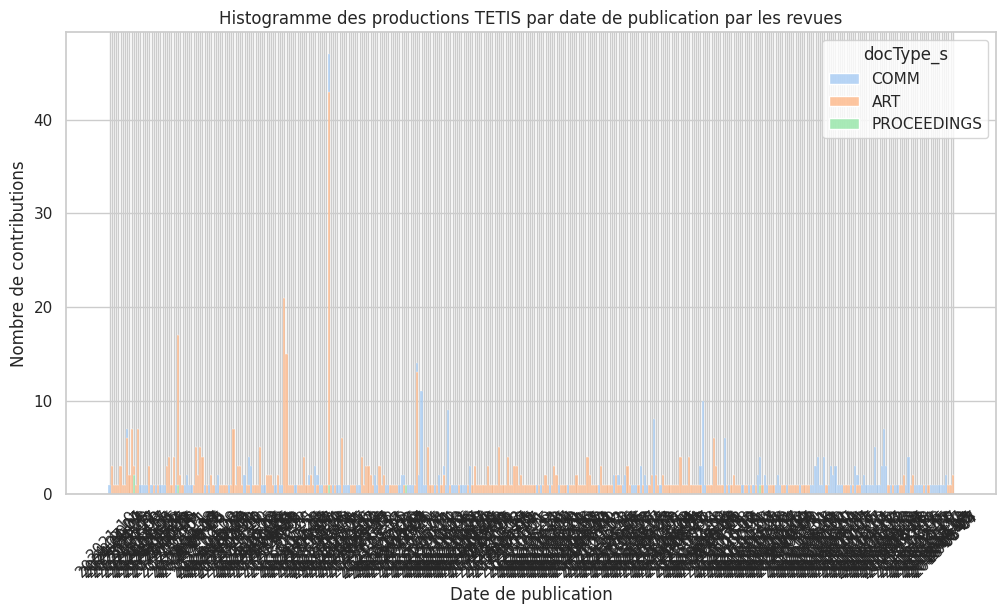

In [64]:
plt.figure(figsize=(12, 6))
selected_publication_types = ["ART", "COMM", "PROCEEDINGS"]
df_filtered = df[df['docType_s'].isin(selected_publication_types)]
df_filtered = df_filtered[df_filtered['journalDate_s'] >= '2018-01-01']
sns.histplot(data=df_filtered, x="journalDate_s", stat="count", binwidth=30, hue="docType_s", multiple="stack")
plt.title(f'Histogramme des productions {my_lab} par date de publication par les revues')
plt.xlabel('Date de publication')
plt.ylabel('Nombre de contributions')
plt.xticks(rotation=45)